# <center><font color='red'>SYNTHETIC CYTOSKELETONS</font></center>
### <center><font color='orange'>AUTHOR: Diogo Vieira</font></center>

---

### <center><font color='grey'>Imports</font></center>

#### <center><font color='grey'>Libraries</font></center>

In [1]:
# Math, image processing and other useful libraries
from __future__ import print_function, unicode_literals, absolute_import, division
import os

import pandas as pd
import numpy as np
import cv2
from collections import OrderedDict
import copy
import math
import pickle
from matplotlib.ticker import MaxNLocator
from itertools import combinations

# Image processing
from skimage.measure import regionprops
from skimage.filters import meijering, sato, frangi, hessian, threshold_otsu,gaussian
from skimage.morphology import extrema, skeletonize
from skimage.transform import probabilistic_hough_line
from skimage.draw import disk, circle_perimeter
from scipy.ndimage import gaussian_filter, grey_closing
from scipy.spatial import distance_matrix
from skimage import data, restoration, util
from roipoly import RoiPoly


# Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as pltc
import matplotlib.colors as colors


# Widgets


# Feature Extraction (.py files by Teresa Parreira)
# from CytoSkeletonPropsMorph import CytoSkeletonPropsMorph
# from CytoSkeletonRegionPropsInt import RegionPropsInt
# from FreqAnalysis import FreqAnalysis
# from GLCM import GLCM

# Graph


# 


import scipy as sp
import scipy.sparse
from matplotlib.patches import Circle

#from framework.Functions import cv2toski,pylsdtoski,polar_to_cartesian, remove_not1D, quantitative_analysis,hist_bin,hist_lim,create_separate_DFs,branch,graphAnalysis
#from framework.Importing import label_image,init_import

#from fractal_dimension import fractal_dimension
#from fractal_analysis_fxns import boxcount,boxcount_grayscale,fractal_dimension,fractal_dimension_grayscale,fractal_dimension_grayscale_DBC

print('📚 All libraries successfully imported 📚')

📚 All libraries successfully imported 📚


In [34]:
import random
from skimage.draw import ellipse
from skimage.color import rgb2gray, rgba2rgb

def subsample_mask(mask,frac):
    x          = np.arange(0, mask.shape[0]-1, frac)
    y          = np.arange(0, mask.shape[1]-1, frac)
    meshpoints = np.dstack(np.meshgrid(x, y)).reshape(-1, 2) 
    grelha = np.zeros_like(mask)

    for point in meshpoints:
        grelha[point[0],point[1]] = 1

    gridpoints = mask * grelha
    
    return gridpoints

def get_unit_line(length,theta):
    pos1 = (0,0)
    a = np.sin(theta)
    b = np.cos(theta)
    posx = a*length
    posy = b*length
    return pos1,(posx[0],posy[0])

def createsynthetic(N_lines,cell_size,cell_type,angle_type,mu,sigma,density,membrane):
    global angle,length,offset,pos1,pos2,lines,pixels,pixels_mic,pixels_membrane,mask,m,rr,cc
    
    #center = int(cell_size + /2),int(cell_size/2)
    off = 5
    
    if cell_type == 'round':
        rr, cc = disk((cell_size+off,cell_size+off), cell_size)
        z = np.zeros((2*cell_size+2*off,2*cell_size+2*off))
        pixels = list(zip(rr,cc))
        m = copy.deepcopy(z)
        m[rr,cc] = 1
        #plt.imshow(m,cmap='gray')
        
        if type(membrane) == tuple:
            rr_mic,cc_mic = disk((cell_size+off,cell_size+off), cell_size-membrane[0])
            #z_mic = np.zeros((2*cell_size+2*off,2*cell_size+2*off))
            pixels_mic = list(zip(rr_mic,cc_mic))
            pixels_membrane = list(set(pixels) - set(pixels_mic))
            
    if cell_type == 'ellipse':
        # Calculate the dimensions of the bounding box
        bbox_width = int(np.ceil(np.sqrt((cell_size[1] / 2) ** 2 + (cell_size[0] / 2) ** 2) * 2))
        bbox_height = int(np.ceil(np.sqrt((cell_size[1] / 2) ** 2 + (cell_size[0] / 2) ** 2) * 2))

        # Calculate the center coordinates of the ellipse
        center_x = bbox_width // 2
        center_y = bbox_height // 2
        
        z = np.zeros((bbox_height, bbox_width))
        
        rr, cc = ellipse(center_y,center_x, cell_size[0]// 2,cell_size[1]// 2,rotation=cell_size[2],shape=z.shape)
        pixels = list(zip(rr,cc))
        #z = np.zeros((max(rr)+2*off,max(cc)+2*off))
        m = copy.deepcopy(z)
        m[rr,cc] = 1
        
        
    if cell_type == 'draw':
        %matplotlib qt
        figROI,axROI = plt.subplots(figsize=(30,30))
        img = np.zeros((1040,1388))
        plt.imshow(img,cmap='gray')
        plt.axis('off')
        plt.title('Draw Cell Contour/Shape')
        
        # Define ROI
        ROI = RoiPoly(color='r')
        #ROI.display_roi()
        
        mask = ROI.get_mask(img)
        x_,y_   = np.where((mask*1) != 0)
        
        
        #m = mask
        
        m = mask[min(x_)-off:max(x_)+off,min(y_)-off:max(y_)+off]
        pixels = list(zip(np.where(m != 0)[0],np.where(m != 0)[1]))
        #z = mask[(min(pixels[1])-off):(max(pixels[1])+off),(min(pixels[0])-off):(max(pixels[0])+off)]
        z = np.zeros((m.shape[0],m.shape[1]))
        %matplotlib inline
        plt.figure()
        plt.title('mask')
        plt.imshow(m,cmap='gray')
        plt.show()

    # Init
    
    lines = []
    n     = 0
    
    # Create lines in random positions
#     while n < N_lines:
#         if angle_type == 'uniform':
#             angle  = np.random.uniform(-np.pi,np.pi,1)
#         if angle_type == 'normal':
#             angle  = np.random.normal(3*np.pi/180,10*np.pi/180,1)
#         length = np.random.normal(mu, sigma, 1)
#         offset = random.choice(pixels)
#         pos1,pos2 = get_line(length,angle)
#         #if (int(pos1) in rr and int(pos2) in cc) or (int(pos1) in cc and int(pos2) in rr):
#         if (int(pos1[0] + offset[0]),int(pos1[1] + offset[1])) in pixels and (int(pos2[0] + offset[0]),int(pos2[1] + offset[1])) in pixels:
#             lines = lines + [((pos1[0]+offset[0],pos1[1]+offset[1]),(pos2[0] + offset[0],pos2[1]+offset[1]))]
#             #lines = lines + [((pos1[0],pos1[1]),(pos2[0],pos2[1]))]
#             n = n + 1

    
    # Create lines in a grid      
    gridpoints = subsample_mask(m,density)       
    x_points,y_points = np.where(gridpoints == 1)
    points = list(zip(x_points,y_points))
    for p in points:
        # ANGLE
        if angle_type == 'uniform':
            angle  = np.random.uniform(-np.pi,np.pi,1)
        if angle_type == 'normal':
            if cell_type == 'ellipse':
                angle  = np.random.normal(np.pi - cell_size[2],20*np.pi/180,1)
            else:
                angle  = np.random.normal(30*np.pi/180,5*np.pi/180,1)
        
        # LENGTH
        length = np.random.normal(mu, sigma, 1)
        
        # LINE
        pos1,pos2 = get_unit_line(length,angle)
        if (int(pos1[0] + p[0]),int(pos1[1] + p[1])) in pixels and (int(pos2[0] + p[0]),int(pos2[1] + p[1])) in pixels:
            lines = lines + [((pos1[0]+p[0],pos1[1]+p[1]),(pos2[0] + p[0],pos2[1]+p[1]))]
            #lines = lines + [((pos1[0],pos1[1]),(pos2[0],pos2[1]))]
    
    
    
    # MEMBRANE
    if (type(membrane) == tuple):
        n = 0
        while (n < membrane[1]):
            angle  = np.random.uniform(-np.pi,np.pi,1)
            length = np.random.normal(mu, sigma, 1)
            offset = random.choice(pixels_membrane)
            pos1,pos2 = polar2cartesian(length,angle)
            if (int(pos1[0] + offset[0]),int(pos1[1] + offset[1])) in pixels_membrane and (int(pos2[0] + offset[0]),int(pos2[1] + offset[1])) in pixels_membrane:
                lines = lines + [((pos1[0]+offset[0],pos1[1]+offset[1]),(pos2[0] + offset[0],pos2[1]+offset[1]))]
                n = n + 1
        
            
    # Plot
    fig,ax = plt.subplots(figsize=(5,5))
    #maxx = int(np.array(lines).max()) 
    #minn = int(np.array(lines).min()) 
    #plt.imshow(np.zeros((abs(maxx-minn),abs(maxx-minn))),cmap='gray')
    #plt.imshow(z,cmap='gray')
    
    from skimage.draw import line
    for l in lines:
        p0,p1 = l
        #print(p0,p1)
        #print(int(p0[0]),int(p1[0]),int(p0[1]),int(p1[1]))
        rr, cc = line(int(p0[0]),int(p0[1]),int(p1[0]),int(p1[1]))
        z[rr,cc] = 1
        #pixels = list(zip(rr,cc)))
        #ax.plot((p0[0], p1[0]), (p0[1], p1[1]),linewidth=2,color='w',zorder=3)
        
        
    plt.axis('off')
    plt.imshow(z,cmap='gray')
#     if cell_type == 'draw':
#         ax.set_ylim([min(pixels[0]),max(pixels[0])])
#         ax.set_xlim([min(pixels[1]),max(pixels[1])])
    plt.show()
    
    
    
    # PREPROCESSING
    global gau
    gau = gaussian(z,sigma=1)
    noise_mask = np.random.poisson(z)
    noisy_img = z + noise_mask
    
    fig,ax = plt.subplots()
    ax.imshow(noisy_img,cmap='gray')
    plt.axis('off')
    plt.show()
    
    return lines,fig

print('FUNCTION: createsynthetic(lines)')

FUNCTION: createsynthetic(lines)


In [3]:
np.array(lines).shape

NameError: name 'lines' is not defined

In [76]:
cc

array([0, 1, 2, 3, 4], dtype=int64)

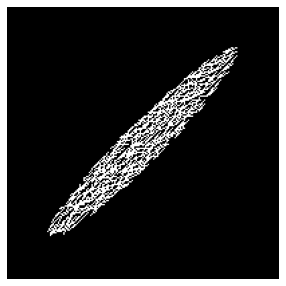

C:\Users\diogo\anaconda3\envs\ROIselection4\lib\site-packages\skimage\util\dtype.py:226: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  dtypeobj_out = np.dtype(dtype)


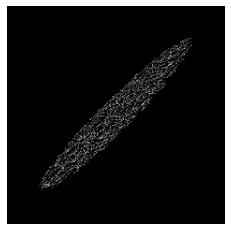

In [50]:
%matplotlib inline
#lines,fig = createsynthetic(N_lines=250,cell_size=50,cell_type='round',angle_type='uniform',mu=6,sigma=0.5,membrane=(8,10))
#lines,fig = createsynthetic(N_lines=250,cell_size=100,cell_type='round',angle_type='uniform',mu=10,sigma=0.5,density=5,membrane=False)
#lines,fig = createsynthetic(N_lines=100,cell_size=None,cell_type='draw',angle_type='uniform',mu=10,sigma=1,density=5,membrane=False)
lines,fig = createsynthetic(N_lines=200,cell_size=(30,200,45*np.pi/180),cell_type='ellipse',angle_type='normal',mu=7,sigma=1,density=3,membrane=False)
#lines,fig = createsynthetic(N_lines=250,cell_size=100,cell_type='draw',angle_type='uniform',mu=10,sigma=0.5,membrane=False)



# membrane: False or (thickness,number of lines)
# cell_size: (int) radius for round cells, (minor axis,major axis,rotation) for ellipse cells, (int) radius for draw
# angle_type: uniform or normal
# noise: add poisson noise

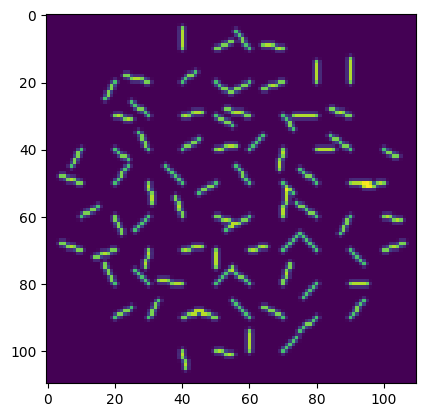

In [66]:
plt.imshow(gau)

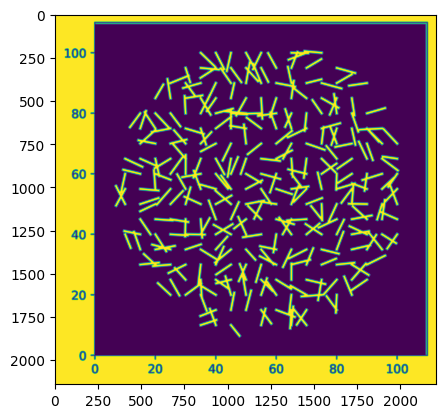

In [57]:
gau = preprocessing_syn()
plt.imshow(gau)

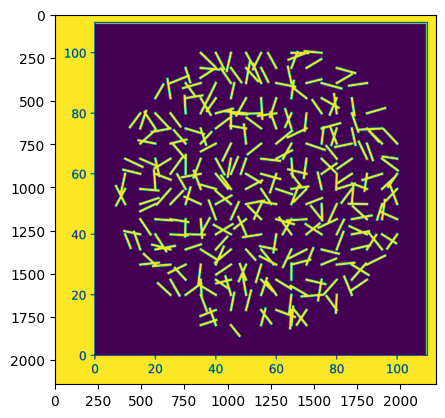

In [52]:
plt.imshow(im)

In [4]:
#### <center><font color='grey'>Directories</font></center>#### <center><font color='grey'>Directories</font></center>z = np.zeros((2*radius,2*radius))
plt.imshow(z,cmap='gray')
circle = plt.Circle((radius,radius), radius, fill=True, color = 'w')
plt.gcf().gca().add_artist(circle)

NameError: name 'radius' is not defined

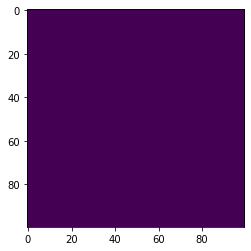

In [30]:
plt.imshow(z)

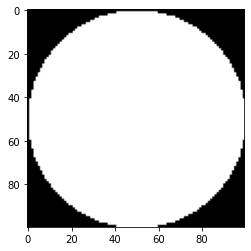

In [33]:
radius = 50
rr, cc = disk((radius,radius), int(radius))
disk_pixels_  = list(zip(rr,cc))
z = np.zeros((2*radius,2*radius))
z[rr,cc] = 1
plt.imshow(z,cmap='gray')

In [79]:
help(ellipse)

Help on function ellipse in module skimage.draw.draw:

ellipse(r, c, r_radius, c_radius, shape=None, rotation=0.0)
    Generate coordinates of pixels within ellipse.
    
    Parameters
    ----------
    r, c : double
        Centre coordinate of ellipse.
    r_radius, c_radius : double
        Minor and major semi-axes. ``(r/r_radius)**2 + (c/c_radius)**2 = 1``.
    shape : tuple, optional
        Image shape which is used to determine the maximum extent of output pixel
        coordinates. This is useful for ellipses which exceed the image size.
        By default the full extent of the ellipse are used. Must be at least
        length 2. Only the first two values are used to determine the extent.
    rotation : float, optional (default 0.)
        Set the ellipse rotation (rotation) in range (-PI, PI)
        in contra clock wise direction, so PI/2 degree means swap ellipse axis
    
    Returns
    -------
    rr, cc : ndarray of int
        Pixel coordinates of ellipse.
        M

In [ ]:
rr, cc = disk((cell_size,cell_size), cell_size)

In [2]:
def polar_to_cartesian(lines):
    res = []
    lines = lines.reshape((lines.shape[0],lines.shape[2]))
    for i in lines:
        rho,theta = i[0],i[1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        res += [((x1,y1),(x2,y2))]
        
    return res

print('FUNCTION: polar_to_cartesian(lines)')

FUNCTION: polar_to_cartesian(lines)


In [3]:
def polar2cartesian(rho,theta):
    global a,b,x0,x1,x1,x2,y1,y2
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1*(-b))
    y1 = int(y0 + 1*(a))
    x2 = int(x0 - 1*(-b))
    y2 = int(y0 - 1*(a))
    return (x1,y1),(x2,y2)

print('FUNCTION: polar2cartesian(rho,theta)')

FUNCTION: polar2cartesian(rho,theta)


In [29]:
plt.imshow(mask)

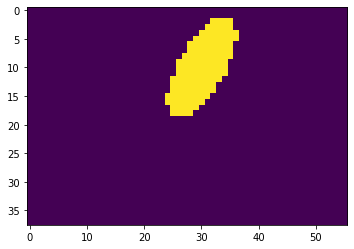

In [21]:
from skimage.draw import ellipse
off = 5
rr, cc = ellipse(20,40, 4,10,rotation=np.pi/3)
z = np.zeros((np.max(rr) + 2*off,np.max(cc) + 2*off))
z[rr-2*off,cc-2*off] = 1
plt.imshow(z)

In [223]:
fig.patch

In [224]:
help(ax)

Help on Figure in module matplotlib.figure object:

class Figure(FigureBase)
 |  Figure(figsize=None, dpi=None, facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, subplotpars=None, tight_layout=None, constrained_layout=None, *, layout=None, **kwargs)
 |  
 |  The top level container for all the plot elements.
 |  
 |  The Figure instance supports callbacks through a *callbacks* attribute
 |  which is a `.CallbackRegistry` instance.  The events you can connect to
 |  are 'dpi_changed', and the callback will be called with ``func(fig)`` where
 |  fig is the `Figure` instance.
 |  
 |  Attributes
 |  ----------
 |  patch
 |      The `.Rectangle` instance representing the figure background patch.
 |  
 |  suppressComposite
 |      For multiple images, the figure will make composite images
 |      depending on the renderer option_image_nocomposite function.  If
 |      *suppressComposite* is a boolean, this will override the renderer.
 |  
 |  Method resolution order:
 |      Figu

In [ ]:
lsd   = cv2.createLineSegmentDetector(cv2.LSD_REFINE_ADV,2.5,0.001,0,90,-200,0.5,2048)
lines = cv2toski(lsd.detect((patch * 255).astype(np.uint8))[0])
    

In [125]:
[1,2,3,4].symmetric_difference([1,2])

AttributeError: 'list' object has no attribute 'symmetric_difference'

In [112]:
createsynthetic(50,50,'round',)

TypeError: createsynthetic() missing 2 required positional arguments: 'mu' and 'sigma'

In [5]:
s = np.random.normal(0, 0.1, 1000)

In [87]:
np.array(lines).min()

-32.887237260930696